In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import urllib.request
import json

In [2]:
df1=pd.read_csv('HD_3year.csv')

In [3]:
df1 = df1[(df1['DH_Heating_Rate'] <= 300)]
df1.dropna
X = df1['Outdoor_Temperature']
y = df1['DH_Heating_Rate'].round(2)

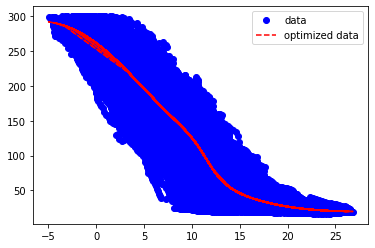

In [4]:
def test(x, a, b, c, d, e, f, g, h, i): 
    return (a+(b*x)+(c*x*x)+(d*x*x*x)+(e*x*x*x*x))/(1+(f*x)+(g*x*x)+(h*x*x*x)+(i*x*x*x*x))

param, param_cov = curve_fit(test, X, y)
plt.plot(X, y, 'o', color ='blue', label ="data") 
plt.plot(X, test(X, param[0], param[1], param[2],param[3],param[4],param[5],param[6],
                param[7],param[8]), '--', color ='red', label ="optimized data") 

plt.legend() 
plt.show()

In [6]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/forecasts/v1/hourly/12hour/330088?apikey=jHCulUAmQjb1DfjoUphGgJdIAmTY8FXq')
response = json.loads(f.read())
weatherforecast = np.array([])
Forecast_DH = np.array([])
for i in range(12):
    temp=(response[i]['Temperature']['Value']-32)*5/9
    weatherforecast = np.append(weatherforecast,temp).round(2) 
for i in weatherforecast:
    if (i>27):
        Forecast_DH = np.append(Forecast_DH,20).round(2)
    else:
        Forecast_DH = np.append(Forecast_DH,test(i, param[0], param[1], param[2],param[3],param[4],param[5],param[6],
                param[7],param[8])).round(2)


HTTPError: HTTP Error 503: Unauthorized

In [ ]:
plt.scatter(weatherforecast, Forecast_DH)
plt.show()